# <b>Diabetes Analysis</b>

## <b>Menyaipkan semua library yang dibutuhkan</b>

In [357]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <b>Data Wrangling</b>

### <b>Gathering Data</b>

In [358]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### <b>Assessing Data</b>

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [360]:
df.shape

(100000, 9)

In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


Memeriksa missing value

In [362]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Memeriksa duplikasi data

In [363]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  3854


In [364]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


Oke, sampai tahap ini, kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan rangkumannya.<br>
| Type Data                                                                                                    | Missing Value | Duplicate Data | Inaccurate Value |
|--------------------------------------------------------------------------------------------------------------|---------------|----------------|------------------|
| Terdapat kesalahan type data untuk kolom gender dan age. | -            | Terdapat 3854 duplikasi data              | -                |

### <b>Cleaning Data</b>

Pada tahap ini, kita akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data.
- Menghapus duplikasi data.
- Mengganti value pada kolom <b><i>gender</i></b> menjadi integer.<br>
  Note:<br>
  - Female = 0
  - Male = 1<br>
- Mengganti type data untuk kolom <b><i>gender</i></b> menjadi integer.
- Menghapus kolom <b><i>smoking_history</i></b> karena banyak data yang No Info.
- Memisahkan colom <b><i>gender</i></b> menjadi kolom <b><i>male</i></b> dan <b><i>female</i></b> dengan menggunakan <b><i>one-hot decoding</i></b>.

##### 1. Menghapus duplikasi data

In [365]:
df.drop_duplicates(inplace=True)

print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


##### 2. Mengubah value

In [366]:
gender = df['gender'].value_counts()
print(gender)

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


In [367]:
df['gender'] = df['gender'].replace({
    'Other': 'Female'
})

In [368]:
df = df.replace({'gender': {'Male': 0, 'Female': 1}})
df.head()

C:\Users\ikmal\AppData\Local\Temp\ipykernel_8328\1643847726.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'gender': {'Male': 0, 'Female': 1}})


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [369]:
gender = df['gender'].value_counts()
print(gender)

gender
1    56179
0    39967
Name: count, dtype: int64


One-hot encoding kolom gender menjadi kolom male dan famale

In [370]:
df.insert(1, 'male', df['gender'].apply(lambda x: 1 if x == 0 else 0))
df.insert(2, 'female', df['gender'].apply(lambda x: 1 if x == 1 else 0))

df = df.drop(columns='gender')
df.head()

,male,female,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1,80.0,0,1,never,25.19,6.6,140,0
1,0,1,54.0,0,0,No Info,27.32,6.6,80,0
2,1,0,28.0,0,0,never,27.32,5.7,158,0
3,0,1,36.0,0,0,current,23.45,5.0,155,0
4,1,0,76.0,1,1,current,20.14,4.8,155,0


In [371]:
smoking_history = df['smoking_history'].value_counts()
print(smoking_history)

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64


In [372]:
df = df.drop('smoking_history', axis=1)
df.head()

,male,female,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1,80.0,0,1,25.19,6.6,140,0
1,0,1,54.0,0,0,27.32,6.6,80,0
2,1,0,28.0,0,0,27.32,5.7,158,0
3,0,1,36.0,0,0,23.45,5.0,155,0
4,1,0,76.0,1,1,20.14,4.8,155,0


In [373]:
df.shape

(96146, 9)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   male                 96146 non-null  int64  
 1   female               96146 non-null  int64  
 2   age                  96146 non-null  float64
 3   hypertension         96146 non-null  int64  
 4   heart_disease        96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


In [375]:
X = df.drop('diabetes', axis=1)  # Fitur
y = df['diabetes']               # Target

### <b>1. Logistic Regression</b>

In [376]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [377]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [378]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.01, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000)

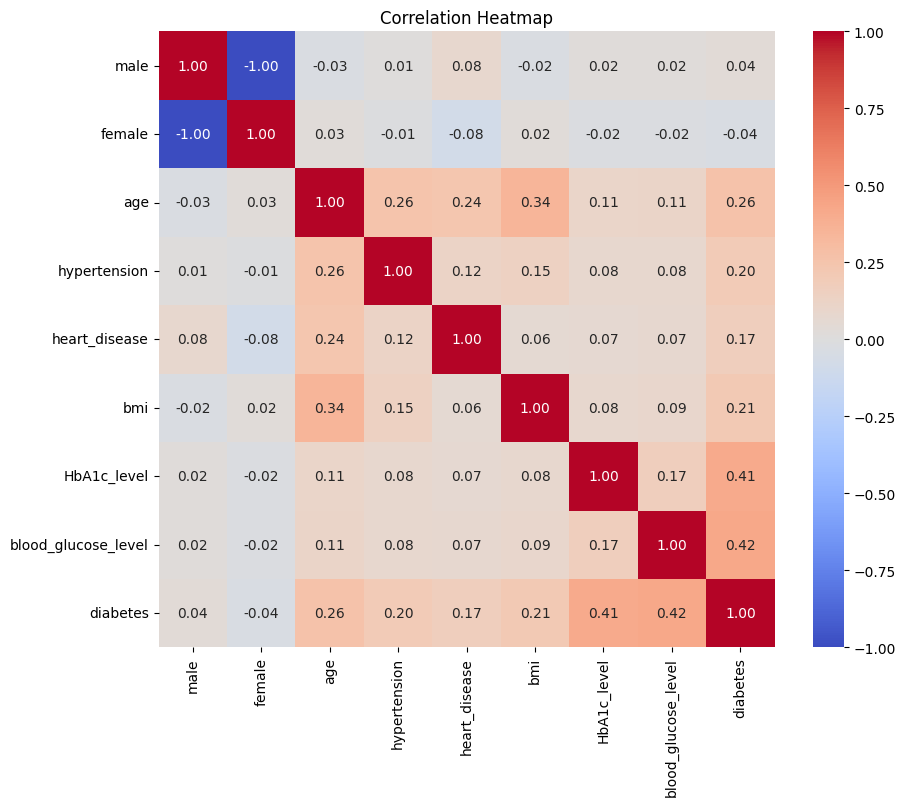

In [379]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [380]:
from sklearn.metrics import accuracy_score

# Evaluate on training data
y_train_pred = (model.predict(X_train) > 0.5)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate on testing data
y_test_pred = (model.predict(X_test) > 0.5)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 95.87%
Testing Accuracy: 95.84%


In [381]:
# Melakukan prediksi probabilitas
# male, female, age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level
# No diabetes
# new_data = np.array([[0, 1, 36.0, 0, 0, 23.45, 5.0, 155]])
# new_data = np.array([[0, 1, 54.0, 0, 0, 27.32, 6.6, 80]])
# new_data = np.array([[1, 0, 5.0, 0, 0, 18.80, 6.2, 85]])
# new_data = np.array([[0, 1, 30.0, 0, 0, 22.5, 5.4, 90]])
# new_data = np.array([[0, 1, 30.0, 0, 0, 22.0, 5.5, 90]])

# Diabetes
# new_data = np.array([[0, 1, 44.0, 0, 0, 19.31, 7.5, 200]])
# new_data = np.array([[1, 0, 67.0, 0, 1, 27.32, 6.5, 200]])
# new_data = np.array([[1, 0, 73.0, 0, 0, 25.91, 9.0, 160]])
# new_data = np.array([[0, 1, 73.0, 0, 0, 25.91, 9.0, 160]])
# new_data = np.array([[0, 1, 55.0, 1, 0, 28.0, 7.5, 160]])
# new_data = np.array([[0, 1, 20.0, 0, 0, 24.0, 6.8, 150]])
# new_data = np.array([[0, 1, 45.0, 0, 0, 25.0, 6.5, 150]])
# new_data = np.array([[0, 1, 20, 0, 0, 24.0, 7, 200]])


# Membuat data acak untuk fitur-fitur yang diperlukan
male = np.random.randint(0, 2)
female = 1 - male
age = np.random.randint(0.8, 60.)
hypertension = np.random.randint(0, 2)
heart_disease = np.random.randint(0, 2)
bmi = np.random.uniform(10.0, 100.0)
hbA1c_level = np.random.uniform(4.0, 10.0)
blood_glucose_level = np.random.randint(70, 200)

new_data = np.array([[male, female, age, hypertension, heart_disease, bmi, hbA1c_level, blood_glucose_level]])

print("male: ", new_data[0][0])
print("female: ", new_data[0][1])
print("age: ", new_data[0][2])
print("hypertension: ", new_data[0][3])
print("heart_disease: ", new_data[0][4])
print("bmi: ", new_data[0][5])
print("HbA1c_level: ", new_data[0][6])
print("blood_glucose_level: ", new_data[0][7])

new_data_scaled = scaler.transform(new_data)
new_pred_prob = model.predict_proba(new_data_scaled)

# Mengubah probabilitas menjadi prediksi biner (0 atau 1)
new_pred = np.where(new_pred_prob >= 0.5, 1, 0)

# Menampilkan hasil prediksi
print(f'Probabilitas: {new_pred_prob[0][0]:.4f}')
print(f'Prediksi diabetes: {new_pred[0][0]}')

male:  0.0
female:  1.0
age:  49.0
hypertension:  1.0
heart_disease:  1.0
bmi:  90.06545521640182
HbA1c_level:  4.721498652787607
blood_glucose_level:  90.0
Probabilitas: 0.7574
Prediksi diabetes: 1


d:\diabetes-prediction\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### <b>2. Neural Networks</b>

In [382]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [383]:
# X adalah array fitur (input features)
# y adalah array label (output binary: 0 atau 1)

# Contoh split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [384]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.summary()

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

d:\diabetes-prediction\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [385]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.966:
            self.model.stop_training = True
            print("\nReached 96.6% accuracy so cancelling training!")

In [386]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9404 - loss: 0.3411 - val_accuracy: 0.9566 - val_loss: 0.1448
Epoch 2/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9564 - loss: 0.1472 - val_accuracy: 0.9565 - val_loss: 0.1424
Epoch 3/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9560 - loss: 0.1430 - val_accuracy: 0.9571 - val_loss: 0.1393
Epoch 4/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9552 - loss: 0.1422 - val_accuracy: 0.9561 - val_loss: 0.1411
Epoch 5/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9559 - loss: 0.1405 - val_accuracy: 0.9566 - val_loss: 0.1358
Epoch 6/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9569 - loss: 0.1410 - val_accuracy: 0.9545 - val_loss: 0.1352
Epoch 7/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9562 - loss: 0.1383 - val_accuracy: 0.9581 - val_loss: 0.1322
Epoch 8/30
2404/2404 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9572 - loss: 0.1388 - 

In [387]:
# Evaluasi accuracy pada training data
y_train_pred = (model.predict(X_train) > 0.5)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluasi accuracy pada testing data
y_test_pred = (model.predict(X_test) > 0.5)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

2404/2404 ━━━━━━━━━━━━━━━━━━━━ 2s 840us/step
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Accuracy: 96.88%
Testing Accuracy: 96.80%


In [415]:
# Melakukan prediksi probabilitas
# male, female, age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level
# No diabetes
# new_data = np.array([[0, 1, 36.0, 0, 0, 23.45, 5.0, 155]])
# new_data = np.array([[0, 1, 54.0, 0, 0, 27.32, 6.6, 80]])
# new_data = np.array([[1, 0, 5.0, 0, 0, 18.80, 6.2, 85]])
# new_data = np.array([[0, 1, 30.0, 0, 0, 22.5, 5.4, 90]])
# new_data = np.array([[0, 1, 30.0, 0, 0, 22.0, 5.5, 90]])

# Diabetes
# new_data = np.array([[0, 1, 44.0, 0, 0, 19.31, 7.5, 200]])
# new_data = np.array([[1, 0, 67.0, 0, 1, 27.32, 6.5, 200]])
# new_data = np.array([[1, 0, 73.0, 0, 0, 25.91, 9.0, 160]])
# new_data = np.array([[0, 1, 73.0, 0, 0, 25.91, 9.0, 160]])
# new_data = np.array([[0, 1, 55.0, 1, 0, 28.0, 7.5, 160]])
# new_data = np.array([[0, 1, 20.0, 0, 0, 24.0, 6.8, 150]])
# new_data = np.array([[0, 1, 45.0, 0, 0, 25.0, 7, 150]])
# new_data = np.array([[0, 1, 20.0, 0, 0, 24.0, 7, 200]])


# Membuat data acak untuk fitur-fitur yang diperlukan
male = np.random.randint(0, 2)
female = 1 - male
age = np.random.randint(0.8, 60.)
hypertension = np.random.randint(0, 2)
heart_disease = np.random.randint(0, 2)
bmi = np.random.uniform(10.0, 100.0)
hbA1c_level = np.random.uniform(4.0, 10.0)
blood_glucose_level = np.random.randint(70, 200)

new_data = np.array([[male, female, age, hypertension, heart_disease, bmi, hbA1c_level, blood_glucose_level]])

print("male: ", new_data[0][0])
print("female: ", new_data[0][1])
print("age: ", new_data[0][2])
print("hypertension: ", new_data[0][3])
print("heart_disease: ", new_data[0][4])
print("bmi: ", new_data[0][5])
print("HbA1c_level: ", new_data[0][6])
print("blood_glucose_level: ", new_data[0][7])

new_data_scaled = scaler.transform(new_data)
new_pred_prob = model.predict(new_data_scaled)

# Mengubah probabilitas menjadi prediksi biner (0 atau 1)
new_pred = np.where(new_pred_prob >= 0.5, 1, 0)

# Menampilkan hasil prediksi
if new_pred == 1:
    massage = 'Anda berpotensi diabetes!'
else:
    massage = 'Anda tidak berpotensi diabetes!'

print(f'Probabilitas: {new_pred_prob[0][0]:.4f}')
print(f'Prediksi diabetes: {new_pred[0][0]}')
print(f'Prediksi diabetes: {massage}')

male:  0.0
female:  1.0
age:  26.0
hypertension:  0.0
heart_disease:  0.0
bmi:  81.15615370313745
HbA1c_level:  8.024585562682464
blood_glucose_level:  93.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Probabilitas: 0.9965
Prediksi diabetes: 1
Prediksi diabetes: Anda berpotensi diabetes!


d:\diabetes-prediction\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


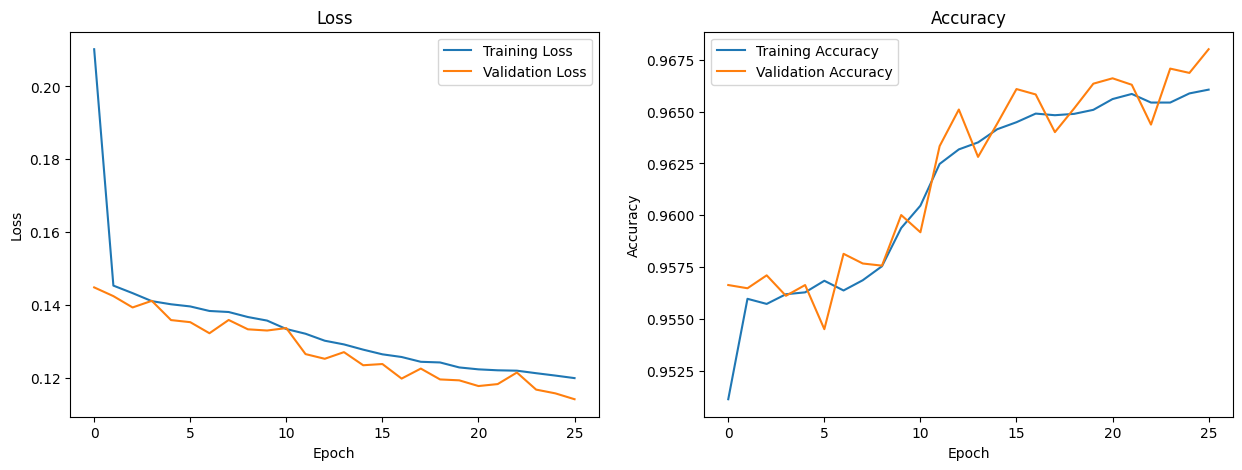

In [389]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot training dan validation loss
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend()
ax[0].set_title('Loss')

# Plot training dan validation accuracy
ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend()
ax[1].set_title('Accuracy')

# Tampilkan plot
plt.show()

### Dari hasil perbandingan algoritma di atas, dalam kasus ini <b><i>Neural Networks</i></b> lebih baik.